In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
# (b) import du fichier'netflix_titles.csv' dans dataframe 'df_netflix'
df_netflix = pd.read_excel('netflix_titles.xlsx')
# df_netflix = pd.read_csv('netflix_titles.csv')
# (c) afficher les 1eres lignes
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,1 Season,"TV Comedies, Action",Kenya Barris and his family navigate relations...
1,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,"Sports Movies, Action","Mixing old footage with interviews, this is th..."
2,s27,TV Show,(Un)Well,NaN,NaN,United States,"August 12, 2020",2020,TV-MA,1 Season,"Reality TV, Action",This docuseries takes a deep dive into the luc...
3,s1,TV Show,​Maj Rati ​​Keteki,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [7]:
df_netflix.shape

(40, 12)

In [8]:
# recherche des NaN de df_netflix
df_netflix.isna().sum() 

show_id         0
type            0
title           0
director        8
cast            5
country         1
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
# (d) affichage graphique du nombre de contenus des 2 types 'TV Show' et 'Movie'
# décompte des valeurs dans colonne 'type'
df_netflix.type.value_counts()

Movie      31
TV Show     9
Name: type, dtype: int64

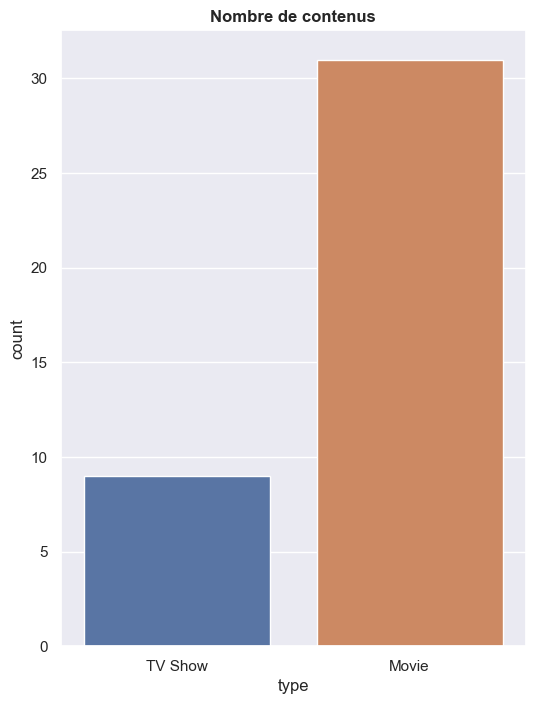

In [10]:
# graphe demandé
sns.set_theme();
plt.figure(figsize=(6, 8));
sns.countplot(x='type', data=df_netflix);
plt.title("Nombre de contenus", fontweight='bold');

In [12]:
# (e) import de 'imdb.csv' dans df_imdb et affichage 1eres lignes
df_imdb = pd.read_excel('imdb.xlsx')
# df_imdb = pd.read_csv('imdb.csv')
df_imdb.head()

,primaryTitle,originalTitle,startYear,averageRating,numVotes
0,dallas,dallas,1990,5.2,1670
1,pink laydy,pink laydy,1988,5.1,208
2,all over,all over,1985,6.1,1394
3,being nobody,being nobody,1986,3.2,123
4,krisna K,krisna K,1987,5.1,2184


In [13]:
df_imdb.shape


(40, 5)

In [14]:
"""
---------- METHODE   MERGE () POUR FUSIONNER LES 2 DF -----------------
"""

'\n---------- METHODE   MERGE () POUR FUSIONNER LES 2 DF -----------------\n'

In [15]:
df_netflix.rename(columns={"release_year":"startYear", "title":"primaryTitle"}, inplace=True) # modif des mons de colonnes d'1 df pour col communes...obligé ,,,
all_content = df_netflix.merge(right=df_imdb, on=['primaryTitle', 'startYear'], how='inner') # choix de methode 'inner' pour une fusion sans NaN supplémentaires

In [16]:
# (f) fusion de df_netflix et df_imdb dans dataframe all_content
all_content = pd.concat([df_netflix, df_imdb], axis = 1)    # marche mais veulent un merge avec colonne commune = 'release_year' de df_netflix et 'startYear' de df_imdb
# all_content = df_netflix.merge(df_imdb, how='inner')       # => faudra peut etre changer le nom de la colonne commune par
# df_netflix.rename(columns={"release_year": "startYear"})  # a faire avant le merge !!!
all_content.head()

,show_id,type,primaryTitle,director,cast,country,date_added,startYear,rating,duration,listed_in,description,primaryTitle,originalTitle,startYear,averageRating,numVotes
0,s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,1 Season,"TV Comedies, Action",Kenya Barris and his family navigate relations...,dallas,dallas,1990,5.2,1670
1,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,"Sports Movies, Action","Mixing old footage with interviews, this is th...",pink laydy,pink laydy,1988,5.1,208
2,s27,TV Show,(Un)Well,NaN,NaN,United States,"August 12, 2020",2020,TV-MA,1 Season,"Reality TV, Action",This docuseries takes a deep dive into the luc...,all over,all over,1985,6.1,1394
3,s1,TV Show,​Maj Rati ​​Keteki,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,being nobody,being nobody,1986,3.2,123
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,krisna K,krisna K,1987,5.1,2184


In [17]:
# vérification 
all_content.shape

(40, 17)

In [18]:
""" Pour la question (g) pensez à utiliser la fonction .apply sur la colonne "listed_in" en appliquant une fonction qui vérifie 
si la chaine de caractères "Action" est présente ou pas."""
# (g) ajout à 'all_content' d'une colonne 'is_action' de valeurs True ou False selon appartenance au contenu à la catégorie 'Action'
"""
is_action = []
for i in all_content.listed_in:
    if 'Action' in i:
        is_action.append(True)
    else:
        is_action.append(False)

all_content['is_action'] = is_action   
                                        ma méthode sans apply ni lambda                """  

"\nis_action = []\nfor i in all_content.listed_in:\n    if 'Action' in i:\n        is_action.append(True)\n    else:\n        is_action.append(False)\n\nall_content['is_action'] = is_action   \n                                        ma méthode sans apply ni lambda                "

In [19]:
# (g) solution
all_content['is_action'] = all_content.apply(lambda col: col.str.contains('Action', na=False), axis=1)['listed_in']



In [20]:
all_content.head()

,show_id,type,primaryTitle,director,cast,country,date_added,startYear,rating,duration,listed_in,description,primaryTitle,originalTitle,startYear,averageRating,numVotes,is_action
0,s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,1 Season,"TV Comedies, Action",Kenya Barris and his family navigate relations...,dallas,dallas,1990,5.2,1670,True
1,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,"Sports Movies, Action","Mixing old footage with interviews, this is th...",pink laydy,pink laydy,1988,5.1,208,True
2,s27,TV Show,(Un)Well,NaN,NaN,United States,"August 12, 2020",2020,TV-MA,1 Season,"Reality TV, Action",This docuseries takes a deep dive into the luc...,all over,all over,1985,6.1,1394,True
3,s1,TV Show,​Maj Rati ​​Keteki,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,being nobody,being nobody,1986,3.2,123,False
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,krisna K,krisna K,1987,5.1,2184,False


In [21]:
# (h) création du dataset 'all_movies' extrait du dataset 'all_content' contenant seulement les films du type 'Movie'
# on créé d'abord une liste boolean des films de type 'Movie'
all_movie = all_content[all_content.apply(lambda col: col.str.contains('Movie', na=False), axis=1)['type']]

"""
is_movie = []
for i in all_content.type:
    if 'Movie' in i:
        is_movie.append(True)
    else:
        is_movie.append(False)
# puis on utilise cette liste pour filtrer le dataset 'all_content'
all_movie = all_content.loc[is_movie]    """     

"\nis_movie = []\nfor i in all_content.type:\n    if 'Movie' in i:\n        is_movie.append(True)\n    else:\n        is_movie.append(False)\n# puis on utilise cette liste pour filtrer le dataset 'all_content'\nall_movie = all_content.loc[is_movie]    "

In [22]:
all_movie.head(10)

,show_id,type,primaryTitle,director,cast,country,date_added,startYear,rating,duration,listed_in,description,primaryTitle,originalTitle,startYear,averageRating,numVotes,is_action
1,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,"Sports Movies, Action","Mixing old footage with interviews, this is th...",pink laydy,pink laydy,1988,5.1,208,True
7,s15,Movie,​Maj Rati ​​Keteki,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Action, Sci-Fi & Fantasy, ...",Stranded when the Earth is suddenly destroyed ...,Une vie cachée,Une vie cachée,2017,6.9,1587,True
8,s10,Movie,​Maj Rati ​​Keteki,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",NaN,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,Phantom Thread,Phantom Thread,2016,6.1,1681,False
9,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, Action, International Movies, T...","As a grisly virus rampages a city, a lone man ...",Blade Runner 2049,Blade Runner 2050,2015,2.1,1775,True
10,s3,Movie,​Maj Rati ​​Keteki,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, Action, International Movies","When an army recruit is found dead, his fellow...",The Neon Demon,The Neon Demon,2015,2.2,1870,True
11,s7,Movie,​Maj Rati ​​Keteki,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Mad Max - Fury Road,Mad Max - Fury Road,2020,3.1,1670,False
12,s9,Movie,​Maj Rati ​​Keteki,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",The Grand Budapest Hotel,The Grand Budapest Hotel,2019,3.4,208,False
13,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers, Action",A farmer pens a confession admitting to his wi...,almlet,almlet,2018,5.1,1394,True
14,s18,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers, Action","After devastating terror attacks in Norway, a ...",yes no yu,yes no yu,2000,4.1,123,True
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,"September 1, 2019",2014,TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,there s U,there s U,2001,4.2,2184,False


In [23]:
all_movie.shape

(31, 18)

In [24]:
all_movie.reset_index(inplace=True)
# all_movie['duration']

In [28]:
duree = []
for i in all_movie.duration:
    duree.append(int(i[:-4])) 

 # création de la colonne 'duree' dans 'all_movie'    
all_movie['duree'] = duree


C:\Users\user\AppData\Local\Temp\ipykernel_6504\1322687918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_movie['duree'] = duree


In [96]:
duree = []
for i in all_movie.duration:
    duree.append(int(i[:-4])) 

 # création de la colonne 'duree' dans 'all_movie'    
all_movie['duree'] = duree

C:\Users\UserPC\AppData\Local\Temp\ipykernel_7428\3068166293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_movie['duree'] = duree


In [97]:
all_movie.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,primaryTitle,originalTitle,startYear,averageRating,numVotes,is_action,duree
0,1,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,"Sports Movies, Action","Mixing old footage with interviews, this is th...",pink laydy,pink laydy,1988,5.1,208,True,87
1,7,s15,Movie,​Maj Rati ​​Keteki,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Action, Sci-Fi & Fantasy, ...",Stranded when the Earth is suddenly destroyed ...,Une vie cachée,Une vie cachée,2017,6.9,1587,True,91
2,8,s10,Movie,​Maj Rati ​​Keteki,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",NaN,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,Phantom Thread,Phantom Thread,2016,6.1,1681,False,143
3,9,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, Action, International Movies, T...","As a grisly virus rampages a city, a lone man ...",Blade Runner 2049,Blade Runner 2050,2015,2.1,1775,True,99
4,10,s3,Movie,​Maj Rati ​​Keteki,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, Action, International Movies","When an army recruit is found dead, his fellow...",The Neon Demon,The Neon Demon,2015,2.2,1870,True,78


In [98]:
all_movie.duree.dtype

dtype('int64')

<Figure size 288x576 with 0 Axes>

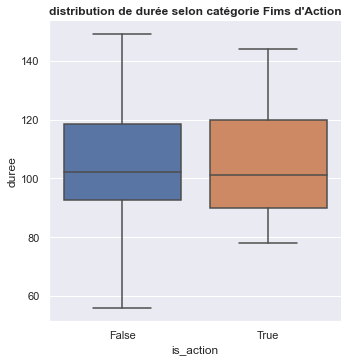

In [100]:
# (j) affichage d'un boxplot de la distribution de 'duree' en fonction de la catégorie 'Action' ou non
sns.set_theme();
plt.figure(figsize=(4, 8));
sns.catplot(x='is_action', y='duree', data=all_movie, kind='box');
plt.title("distribution de durée selon catégorie Fims d'Action", fontweight='bold');

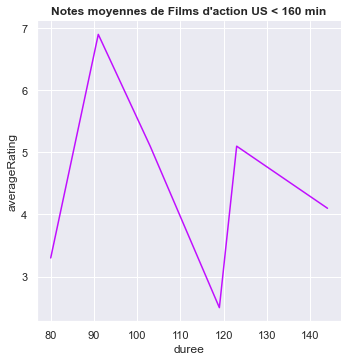

In [133]:
# (k) grâce à une courbe, graph de la relation entre 'durée' d'un film d' "action" dont la variable 'country' == 'United States'
#   ET sa note moyenne sur IMDB = 'averageRating'  ( ne prendre que les films < 160 min )

# filtre des films de 'country' == 'United States'                          
US_country = []
for i in all_movie.country:
    if 'United States' in str(i):    # sans str(i) TypeError: argument of type 'float' is not iterable
        US_country.append(True)
    else:
        US_country.append(False)

# ajout de la colonne 'US_country' à 'all_movie'
all_movie['United_States'] = US_country

# filtrage des lignes dont les films sont < 160 min ET sont de US_country ET sont films d'action
filtre_movie = all_movie.loc[(all_movie.duree < 160) & (all_movie.is_action == True) & (all_movie.United_States == True)]


sns.set_theme();
#plt.figure(figsize=(6, 8));
sns.relplot(data=filtre_movie, x='duree', y='averageRating',kind='line', color='#c00fff');
plt.title("Notes moyennes de Films d'action US < 160 min", fontweight='bold');



In [50]:
# (l) stocker dans une série 'directors' l'ensemble des réalisateurs de all_content

directors = all_content.director.str.split(', ', expand=True).stack().reset_index(drop=True)   # ok attention à l'espace apres la ,

In [76]:
type(directors)

pandas.core.series.Series

array([2, 2, 1, 1, 1, 1, 1, 1], dtype=int64)

In [138]:
# (m) graphe en barres horizontales les 8 réalisatieurs les + présents    

# décompte des valeurs uniques et tri decroissant de 'directors' dans un data frame
df_directors_top = pd.DataFrame(directors.value_counts()) 
# passage des 'noms' d'index en colonne du dataset
df_directors_top = df_directors_top.reset_index()
# renommage des noms des colonnes
dico = {'index':'name', 0:'citations'}                              # modifier decompte par traduction EN
df_directors_top = df_directors_top.rename(dico, axis=1)
# sélection du top 8 des directeurs les + cités
df_dir_top8 = df_directors_top.iloc[:8,:]

<Figure size 864x576 with 0 Axes>

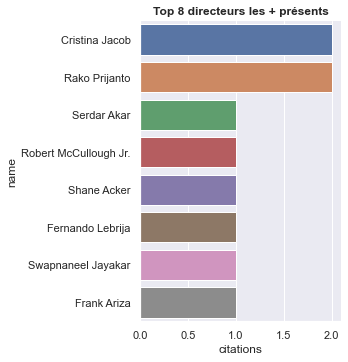

In [139]:
# affichage graphe à bar
sns.set_theme();
plt.figure(figsize=(12,8));
sns.catplot(x='citations', y='name', kind='bar', data=df_dir_top8);   # Yes !!! !!!!!!
#plt.xlim([0,2])
plt.title('Top 8 directeurs les + présents', fontweight='bold');

In [101]:
"""
pd.to_datetime() transforme une serie en serie temporelle de type datetime, on utilise ensuite dt.year ou dt.month pour 
récuperer des infos
"""

'\npd.to_datetime() transforme une serie en serie temporelle de type datetime, on utilise ensuite dt.year ou dt.month pour \nrécuperer des infos\n'

In [104]:
# (o) ajout au df 'all_content' une nouvelle variable 'year' contenant l'année d'un contenu sur Netflix

# Tranformation de la colonne 'date_added' en serie de type datetime
time = pd.to_datetime(all_content.date_added)
# ajout de la série au df 'all_content'
all_content['time_add'] = time
# récup de l'année

all_content['year'] = pd.DatetimeIndex(all_content['time_add']).year

# all_content['month'] = pd.DatetimeIndex(all_content['time_add']).month    # idem pour ajout de month si besoin


In [ ]:
""" PB COURBE PAS belle A REVOIR !!! """

<Figure size 864x576 with 0 Axes>

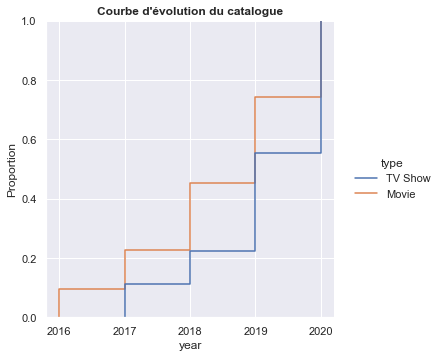

In [137]:
# (p) graphe de la courbe d'évolution du nombre de contenus ajouté au catalogue Netflix ET différencier le type de contenus.
# dans df 'all_content' la colonne 'year' créé = année d'ajout au catalogue
# le type de contenu est dans la colonne 'type'
plt.figure(figsize=(12,8));
#sns.histplot(data=all_content, x='year', hue='type', kde=True, bins=20);
sns.displot(data=all_content, x='year', hue='type', kind='ecdf');
plt.title("Courbe d'évolution du catalogue", fontweight='bold');

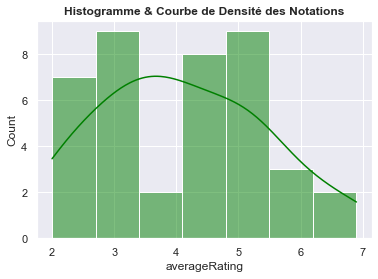

In [122]:
# (q)  afficher histogramme et courbe d'estimation de densité pour analyser 'averageRating' = note moyenne

sns.histplot(data=all_content, x='averageRating', kde=True, color='green');
plt.title("Histogramme & Courbe de Densité des Notations", fontweight='bold');

In [ ]:
# (r) non fait car trop long + manque fonction pour simplifier la création de colonne selon condition sur lignes ( + de temps )

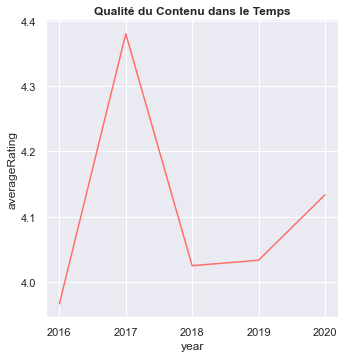

In [125]:
# (s) graphe pour analyser la qualité du contenu au fil du temps
# on regarde les colonnes 'averageRating' pour la note moyenne obtenu, et l'année 'year' de mise en ligne

sns.relplot(data=all_content, x='year', y='averageRating', kind='line', ci=None, color='#ff6f69');
plt.title('Qualité du Contenu dans le Temps', fontweight='bold');

In [135]:
all_content.head(40)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,primaryTitle,originalTitle,startYear,averageRating,numVotes,time_add,year
0,s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,1 Season,"TV Comedies, Action",Kenya Barris and his family navigate relations...,dallas,dallas,1990,5.2,1670,2020-04-17,2020
1,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,"Sports Movies, Action","Mixing old footage with interviews, this is th...",pink laydy,pink laydy,1988,5.1,208,2018-05-16,2018
2,s27,TV Show,(Un)Well,NaN,NaN,United States,"August 12, 2020",2020,TV-MA,1 Season,"Reality TV, Action",This docuseries takes a deep dive into the luc...,all over,all over,1985,6.1,1394,2020-08-12,2020
3,s1,TV Show,​Maj Rati ​​Keteki,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,being nobody,being nobody,1986,3.2,123,2020-08-14,2020
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,krisna K,krisna K,1987,5.1,2184,2017-07-01,2017
5,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United Kingdom,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",Annette,Annette,2020,2.5,1398,2019-03-20,2019
6,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",United Kingdom,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q...",Michel-Ange,Michel-Ange,2019,3.7,1493,2019-03-30,2019
7,s15,Movie,​Maj Rati ​​Keteki,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Action, Sci-Fi & Fantasy, ...",Stranded when the Earth is suddenly destroyed ...,Une vie cachée,Une vie cachée,2017,6.9,1587,2020-03-19,2020
8,s10,Movie,​Maj Rati ​​Keteki,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",NaN,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,Phantom Thread,Phantom Thread,2016,6.1,1681,2017-12-15,2017
9,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, Action, International Movies, T...","As a grisly virus rampages a city, a lone man ...",Blade Runner 2049,Blade Runner 2050,2015,2.1,1775,2020-09-08,2020
